Example 1: Python code for a binary classifier perceptron with a step activation function and SGD training method. Note that, in SGD, the model parameters are updated after each selected sample.

In [8]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2

            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")


# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.7500
Epoch 6/10, Mean Squared Error: 0.7500
Epoch 7/10, Mean Squared Error: 0.7500
Epoch 8/10, Mean Squared Error: 0.7500
Epoch 9/10, Mean Squared Error: 0.7500
Epoch 10/10, Mean Squared Error: 0.7500
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Task 6.1: Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your answer.

ANS: Yes, we needed to run until we got the 1 accuracy, which is with 100 epochs.

In [9]:
epochs_list = [10, 20, 100, 200]
accuracy_list = []

for epoch in epochs_list:
    print(f"Epoch: {epoch}, starting..")
    # Create a perceptron instance with 2 input neurons
    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epoch)

    # Train the perceptron on the dataset
    perceptron.trainSGD(X, y)

    # Test the trained perceptron on the testing samples
    test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    accuracy = 0

    i = 0
    for data in test_data:
        prediction = perceptron.predict(data)
        print(f"Input: {data}, Prediction: {prediction}")
        if prediction == y[i]:
          accuracy = accuracy + 1
        i = i + 1
    accuracy_list.append(accuracy/len(y))
for acc, ep in zip(accuracy_list, epochs_list):
    print(f"At epoch: {ep}, Accuracy: {acc}\n")

Epoch: 10, starting..
Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.7500
Epoch 6/10, Mean Squared Error: 0.7500
Epoch 7/10, Mean Squared Error: 0.7500
Epoch 8/10, Mean Squared Error: 0.7500
Epoch 9/10, Mean Squared Error: 0.5000
Epoch 10/10, Mean Squared Error: 0.5000
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Epoch: 20, starting..
Epoch 1/20, Mean Squared Error: 0.7500
Epoch 2/20, Mean Squared Error: 0.7500
Epoch 3/20, Mean Squared Error: 0.7500
Epoch 4/20, Mean Squared Error: 0.7500
Epoch 5/20, Mean Squared Error: 0.7500
Epoch 6/20, Mean Squared Error: 0.7500
Epoch 7/20, Mean Squared Error: 0.7500
Epoch 8/20, Mean Squared Error: 0.7500
Epoch 9/20, Mean Squared Error: 0.7500
Epoch 10/20, Mean Squared Error: 0.7500
Epoch 11/20, Mean Squared Error: 0.7500
Epoch 12/20, Mean Squa

Task 6.2: Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your observations.

In [10]:
learning_rates = [0.05, 0.1, 0.3, 0.95]

for lr in learning_rates:
  print(f"Learning rate: {lr}, starting..")
  # Create a perceptron instance with 2 input neurons
  perceptron = Perceptron(input_size=2, learning_rate=lr, epochs=10)

  # Train the perceptron on the dataset
  perceptron.trainSGD(X, y)

  # Test the trained perceptron on the testing samples
  test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  accuracy = 0
  i = 0
  for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")
    if prediction == y[i]:
      accuracy = accuracy + 1
    i = i + 1
  print(f"Accuracy: {accuracy/len(y)}\n")

Learning rate: 0.05, starting..
Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.5000
Epoch 6/10, Mean Squared Error: 0.2500
Epoch 7/10, Mean Squared Error: 0.2500
Epoch 8/10, Mean Squared Error: 0.2500
Epoch 9/10, Mean Squared Error: 0.2500
Epoch 10/10, Mean Squared Error: 0.0000
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0

Learning rate: 0.1, starting..
Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.2500
Epoch 3/10, Mean Squared Error: 0.2500
Epoch 4/10, Mean Squared Error: 0.2500
Epoch 5/10, Mean Squared Error: 0.5000
Epoch 6/10, Mean Squared Error: 0.2500
Epoch 7/10, Mean Squared Error: 0.5000
Epoch 8/10, Mean Squared Error: 0.5000
Epoch 9/10, Mean Squared Error: 0.0000
Epoch 10/10, Mean Squared Error: 0.0000
Input: [0 0], Prediction: 0


---

Example 2: Python code for a perceptron with a linear activation function, MSE loss, and SGD training method

In [11]:
import numpy as np
import pandas as pd

class Perceptron:
  def __init__(self, input_size, learning_rate, epochs):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def linear(self, x):
    return x

  def linear_derivative(self, x):
    return 1

  def predict(self, x):
    net_input = np.dot(x, self.weights) + self.bias
    return self.linear(net_input)

  def trainSGD(self, X, y):
    epochs_val = []
    mean_mse_val = []
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      Y_shuffled = y[indices]

      # Iterate on each sample
      for i in range(len(X)):
        prediction = self.predict(X_shuffled[i])
        error = Y_shuffled[i] - prediction

        # Compute gradients using linear derivative
        delta = error * self.linear_derivative(prediction)

        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * delta * X_shuffled[i]
        self.bias += self.learning_rate * delta

        # Accumulate the squared error for this example
        total_mse += error ** 2

      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")
      epochs_val.append(epoch)
      mean_mse_val.append(mean_mse)
    return epochs_val, mean_mse_val

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:54.4299
Epoch 2/10, Mean Squared Error:0.9345
Epoch 3/10, Mean Squared Error:0.8204
Epoch 4/10, Mean Squared Error:0.7764
Epoch 5/10, Mean Squared Error:0.7368
Epoch 6/10, Mean Squared Error:0.6914
Epoch 7/10, Mean Squared Error:0.6586
Epoch 8/10, Mean Squared Error:0.6233
Epoch 9/10, Mean Squared Error:0.5877
Epoch 10/10, Mean Squared Error:0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057, Predicti

Task 6.3: Run the code in Example 2 and notice the difference between the actual output and the predicted output

Task 6.4: Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE and prediction error with the results in Task 6.3. Justify your answer

In [12]:
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/100, Mean Squared Error:68.8430
Epoch 2/100, Mean Squared Error:1.6111
Epoch 3/100, Mean Squared Error:1.4524
Epoch 4/100, Mean Squared Error:1.3650
Epoch 5/100, Mean Squared Error:1.2851
Epoch 6/100, Mean Squared Error:1.2309
Epoch 7/100, Mean Squared Error:1.1646
Epoch 8/100, Mean Squared Error:1.0980
Epoch 9/100, Mean Squared Error:1.0363
Epoch 10/100, Mean Squared Error:0.9834
Epoch 11/100, Mean Squared Error:0.9286
Epoch 12/100, Mean Squared Error:0.8736
Epoch 13/100, Mean Squared Error:0.8359
Epoch 14/100, Mean Squared Error:0.7879
Epoch 15/100, Mean Squared Error:0.7436
Epoch 16/100, Mean Squared Error:0.7028
Epoch 17/100, Mean Squared Error:0.6652
Epoch 18/100, Mean Squared Error:0.6293
Epoch 19/100, Mean Squared Error:0.5969
Epoch 20/100, Mean Squared Error:0.5637
Epoch 21/100, Mean Squared Error:0.5327
Epoch 22/100, Mean Squared Error:0.5043
Epoch 23/100, Mean Squared Error:0.4773
Epoch 24/100, Mean Squared Error:0.4500
Epoch 25/100, Mean Squared Error:0.4273
Epoch 26

Task 6.5: with epochs = 100, plot:
  * MSE with respect to the epoch number;
  * The actual function and the approximated function

In [13]:
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)

# Train the perceptron on the dataset
epochs, mse = perceptron.trainSGD(F, O)

Epoch 1/100, Mean Squared Error:68.4232
Epoch 2/100, Mean Squared Error:2.0067
Epoch 3/100, Mean Squared Error:1.7944
Epoch 4/100, Mean Squared Error:1.7058
Epoch 5/100, Mean Squared Error:1.6054
Epoch 6/100, Mean Squared Error:1.5267
Epoch 7/100, Mean Squared Error:1.4444
Epoch 8/100, Mean Squared Error:1.3658
Epoch 9/100, Mean Squared Error:1.2921
Epoch 10/100, Mean Squared Error:1.2220
Epoch 11/100, Mean Squared Error:1.1528
Epoch 12/100, Mean Squared Error:1.0923
Epoch 13/100, Mean Squared Error:1.0274
Epoch 14/100, Mean Squared Error:0.9743
Epoch 15/100, Mean Squared Error:0.9235
Epoch 16/100, Mean Squared Error:0.8703
Epoch 17/100, Mean Squared Error:0.8289
Epoch 18/100, Mean Squared Error:0.7814
Epoch 19/100, Mean Squared Error:0.7412
Epoch 20/100, Mean Squared Error:0.6991
Epoch 21/100, Mean Squared Error:0.6617
Epoch 22/100, Mean Squared Error:0.6236
Epoch 23/100, Mean Squared Error:0.5931
Epoch 24/100, Mean Squared Error:0.5598
Epoch 25/100, Mean Squared Error:0.5295
Epoch 26

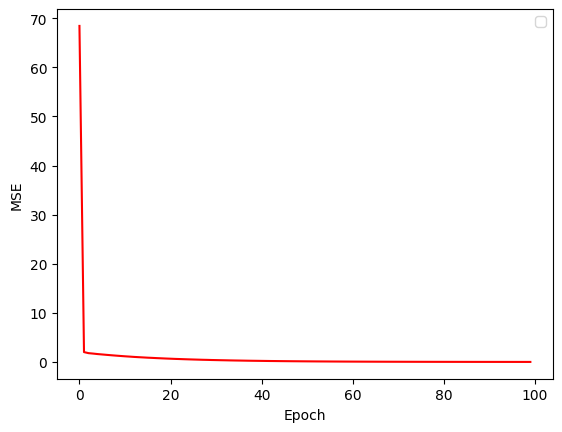

In [14]:
import matplotlib.pyplot as plt

plt.plot(epochs, mse, c='r')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

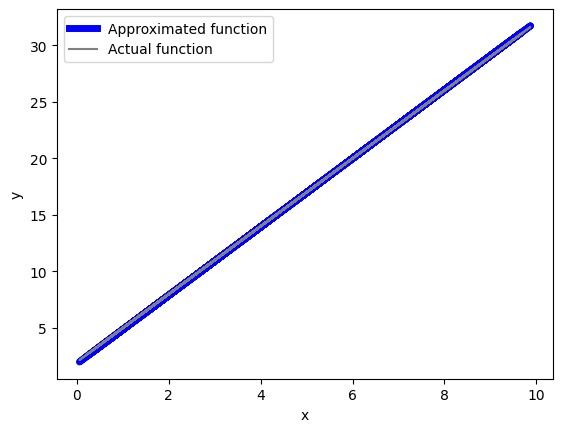

In [15]:
import matplotlib.pyplot as plt

predictions = []
actual = []
# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  predictions.append(prediction)
  actual.append(3*data+2)

plt.plot(x, predictions, c='b', linewidth=5, label="Approximated function")
plt.plot(x, actual, c='gray', label="Actual function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

Task 6.6: Modify the code in Example 2 to approximate f(x,y) = 2x + 3y

In [16]:
import pandas as pd
# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
y = np.random.uniform(low=0, high=10, size=num_samples)
z = 2 * x + 3 * y

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 2
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for xx, yy in zip(x, y):
  t = [xx, yy]
  prediction = perceptron.predict([xx, yy])
  print(f"Input: {xx, yy}, Actual: {2*xx+3*yy}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:75.4408
Epoch 2/10, Mean Squared Error:0.1795
Epoch 3/10, Mean Squared Error:0.0986
Epoch 4/10, Mean Squared Error:0.0824
Epoch 5/10, Mean Squared Error:0.0788
Epoch 6/10, Mean Squared Error:0.0753
Epoch 7/10, Mean Squared Error:0.0731
Epoch 8/10, Mean Squared Error:0.0710
Epoch 9/10, Mean Squared Error:0.0695
Epoch 10/10, Mean Squared Error:0.0658
Input: (3.745401188473625, 0.3142918568673425), Actual: 8.433677947549278, Prediction: 8.888827391535926
Input: (9.50714306409916, 6.364104112637804), Actual: 38.106598466111734, Prediction: 37.96777287736189
Input: (7.319939418114051, 3.143559810763267), Actual: 24.0705582685179, Prediction: 24.20542499789863
Input: (5.986584841970366, 5.085706911647028), Actual: 27.230290418881815, Prediction: 27.328214259799353
Input: (1.5601864044243652, 9.07566473926093), Actual: 30.34736702663152, Prediction: 30.450883618509785
Input: (1.5599452033620265, 2.4929222914887497), Actual: 10.598657281190302, Prediction: 11.045

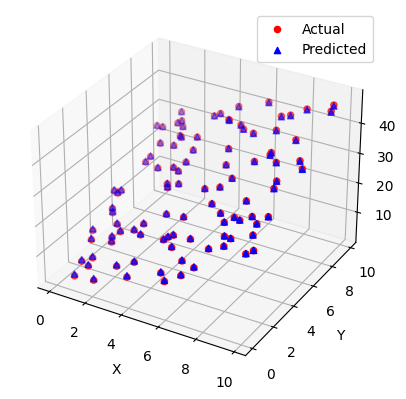

In [17]:
import matplotlib.pyplot as plt

predictions = []
actual = []

for xx, yy in zip(x, y):
  prediction = perceptron.predict([xx, yy])
  predictions.append(prediction)
  actual.append(2*xx+3*yy)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(x, y, actual, c='r', marker='o', label='Actual')

# Scatter plot for validation set
ax.scatter(x, y, predictions, c='b', marker='^', label='Predicted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show plot
plt.show()

---

Task 6.7: Run the code in Example 1 to solve the logical XOR operation with 1000 epochs and compute the accuracy of the tested samples. [note: you need to change the training and testing data to reflect XOR logical operation.]

In [19]:
# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = 0
i = 0
for data in test_data:
  prediction = perceptron.predict(data)
  prediction = 1 if prediction >= 0.5 else 0
  print(f"Input: {data}, Prediction: {prediction}")
  if prediction == y[i]:
    accuracy = accuracy + 1
  i = i + 1
print(f"Accuracy: {accuracy/len(y)}\n")

Epoch 1/1000, Mean Squared Error:1.2117
Epoch 2/1000, Mean Squared Error:1.1489
Epoch 3/1000, Mean Squared Error:1.0934
Epoch 4/1000, Mean Squared Error:1.0429
Epoch 5/1000, Mean Squared Error:0.9983
Epoch 6/1000, Mean Squared Error:0.9577
Epoch 7/1000, Mean Squared Error:0.9210
Epoch 8/1000, Mean Squared Error:0.8875
Epoch 9/1000, Mean Squared Error:0.8570
Epoch 10/1000, Mean Squared Error:0.8295
Epoch 11/1000, Mean Squared Error:0.8049
Epoch 12/1000, Mean Squared Error:0.7821
Epoch 13/1000, Mean Squared Error:0.7608
Epoch 14/1000, Mean Squared Error:0.7415
Epoch 15/1000, Mean Squared Error:0.7240
Epoch 16/1000, Mean Squared Error:0.7080
Epoch 17/1000, Mean Squared Error:0.6927
Epoch 18/1000, Mean Squared Error:0.6787
Epoch 19/1000, Mean Squared Error:0.6653
Epoch 20/1000, Mean Squared Error:0.6528
Epoch 21/1000, Mean Squared Error:0.6413
Epoch 22/1000, Mean Squared Error:0.6305
Epoch 23/1000, Mean Squared Error:0.6201
Epoch 24/1000, Mean Squared Error:0.6105
Epoch 25/1000, Mean Squar

Task 6.8: Run the code in Example 1 to solve the logical XOR operation with 10000 epochs and compute the accuracy of the tested samples. Does the perceptron perform well on approximating XOR with more epochs? Justify your answer.


In [21]:
# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.0001, epochs=10000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = 0
i = 0
for data in test_data:
  prediction = perceptron.predict(data)
  prediction = 1 if prediction >= 0.5 else 0
  print(f"Input: {data}, Prediction: {prediction}")
  if prediction == y[i]:
    accuracy = accuracy + 1
  i = i + 1
print(f"Accuracy: {accuracy/len(y)}\n")

Streaming output truncated to the last 5000 lines.
Epoch 5007/10000, Mean Squared Error:0.3693
Epoch 5008/10000, Mean Squared Error:0.3693
Epoch 5009/10000, Mean Squared Error:0.3692
Epoch 5010/10000, Mean Squared Error:0.3692
Epoch 5011/10000, Mean Squared Error:0.3692
Epoch 5012/10000, Mean Squared Error:0.3692
Epoch 5013/10000, Mean Squared Error:0.3691
Epoch 5014/10000, Mean Squared Error:0.3691
Epoch 5015/10000, Mean Squared Error:0.3691
Epoch 5016/10000, Mean Squared Error:0.3691
Epoch 5017/10000, Mean Squared Error:0.3691
Epoch 5018/10000, Mean Squared Error:0.3690
Epoch 5019/10000, Mean Squared Error:0.3690
Epoch 5020/10000, Mean Squared Error:0.3690
Epoch 5021/10000, Mean Squared Error:0.3690
Epoch 5022/10000, Mean Squared Error:0.3690
Epoch 5023/10000, Mean Squared Error:0.3689
Epoch 5024/10000, Mean Squared Error:0.3689
Epoch 5025/10000, Mean Squared Error:0.3689
Epoch 5026/10000, Mean Squared Error:0.3689
Epoch 5027/10000, Mean Squared Error:0.3689
Epoch 5028/10000, Mean Sq

**Look** at the table

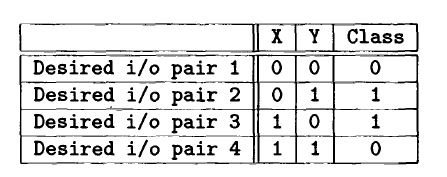

Form the equations:

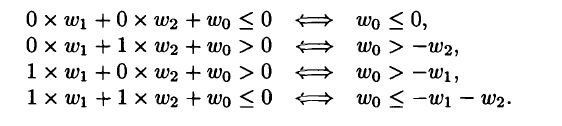

See the second and third equation and then have a look at equation 4. These equations are self-contradictory. Hence, cannot be solved with linear equations.

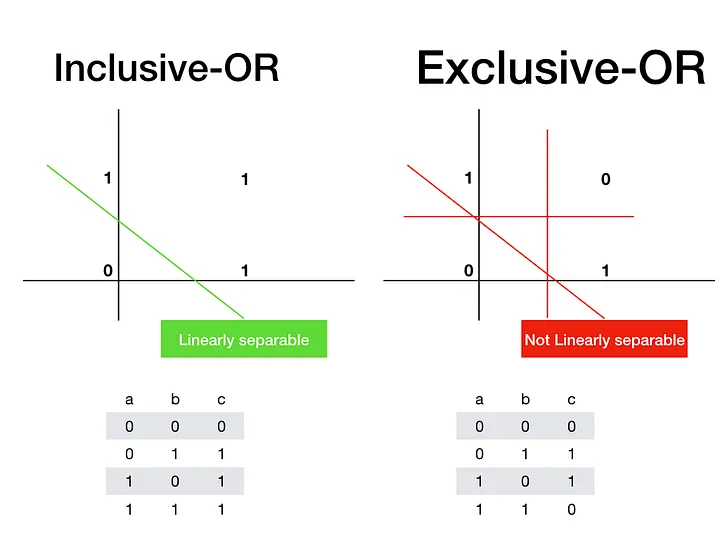

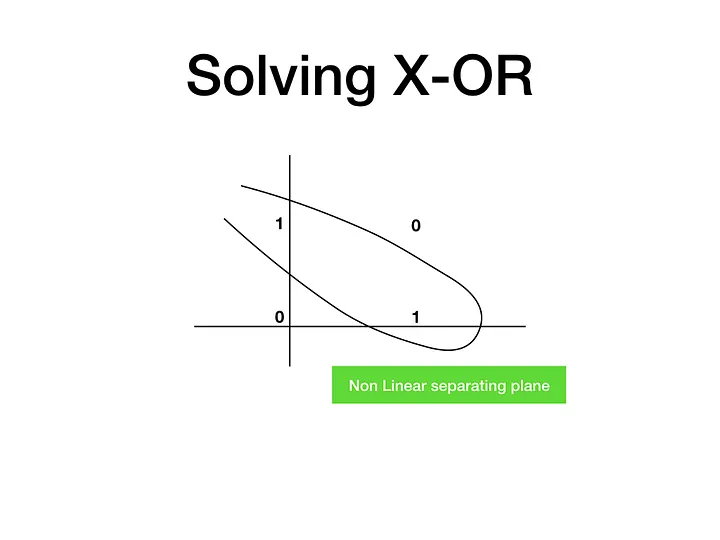

---

Example 3: Python code for building and training an MLP using MLPClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.3667


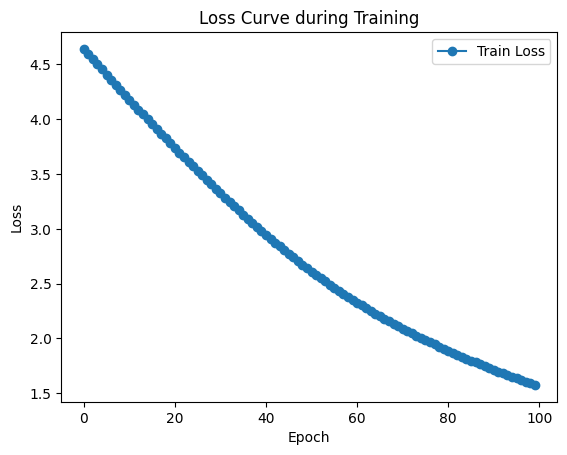

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Task 6.9: Run the code in Example 3 with the following customization of the MLPClassifier. For each case, save the results and compare the accuracy of the testing samples and the loss plot for each
case.
1. hidden_layer_sizes=(10, ), max_iter=1000
2. hidden_layer_sizes=(50, ), activation=relu, max_iter=1000, learning_rate=0.01
3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 1.0000


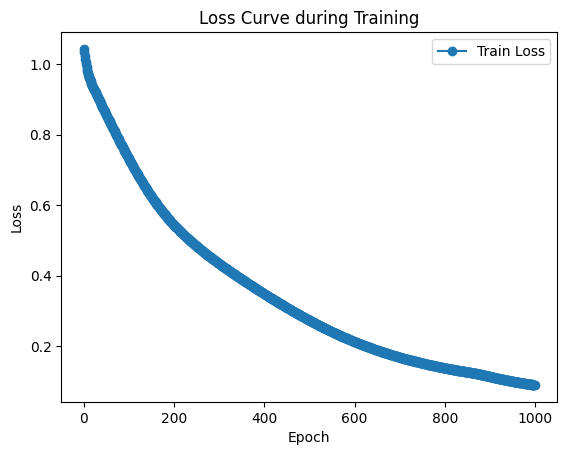

In [ ]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 1.0000


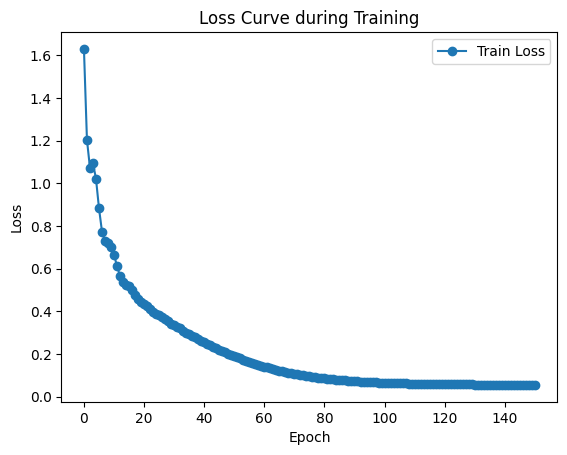

In [ ]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', max_iter=1000, learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 1.0000


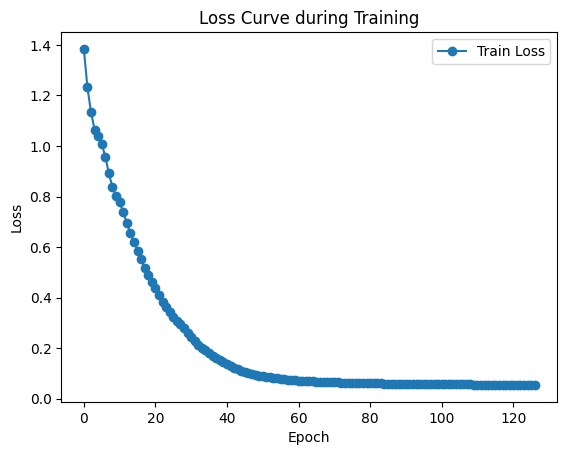

In [ ]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(35, 15), activation='tanh', max_iter=1000, learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Example 4:
Python code for training two MLPClassifiers and plotting the MSE loss and the decision boundary of each trained model.

# Code

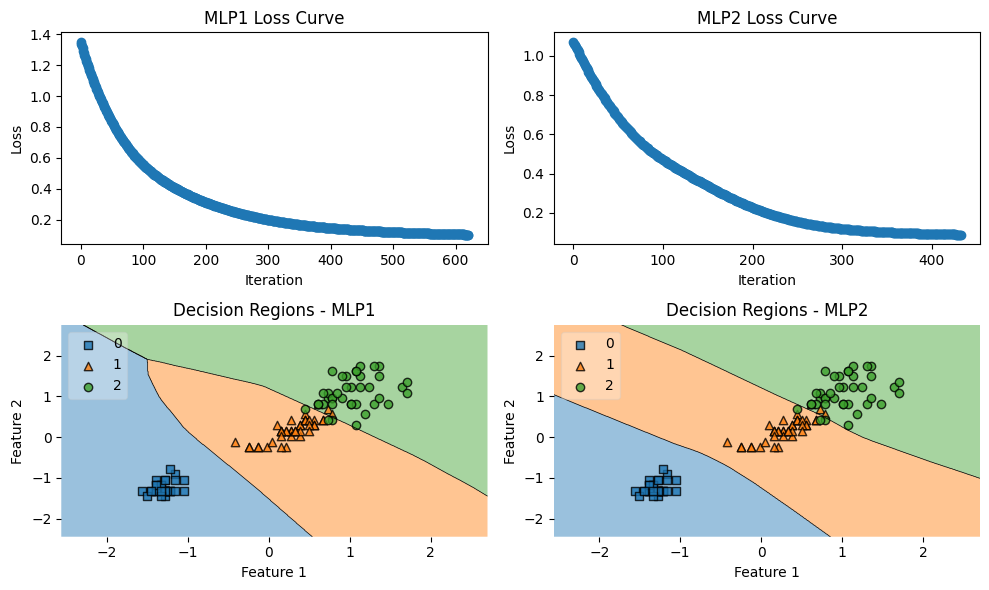

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,
random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.10:
Run the code in Example 4. According to the decision boundary of each model, which one is better? Justify your answer.

The second model (MLP2), the number of iterations is smaller.

## Task 6.11:
Modify Example 4 by using PCA to choose the best two features instead of using information gain. According to the decision boundary of each model, which one is better? Justify your answer.

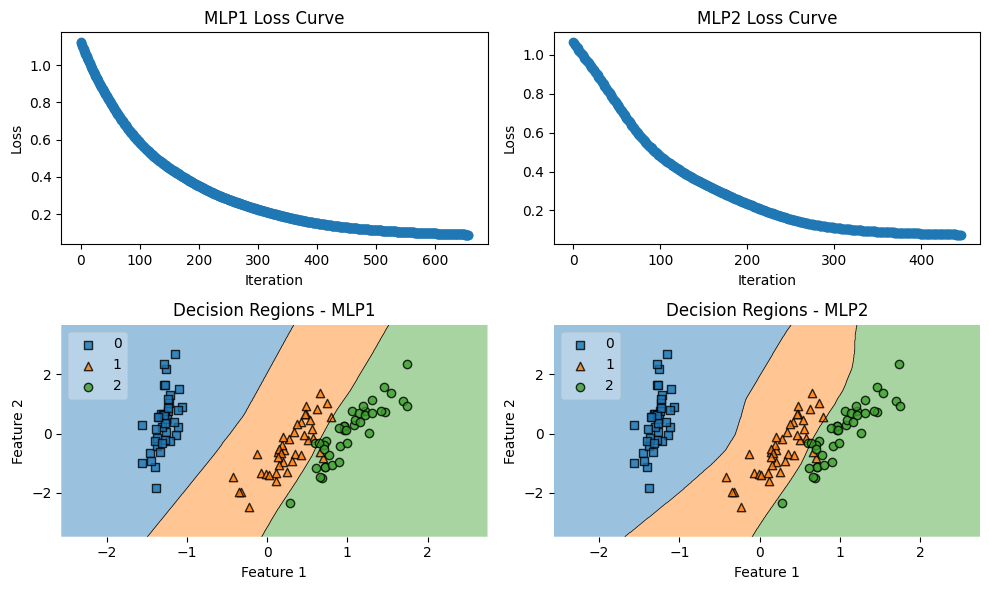

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Use PCA to select the two most important features
pca = PCA(n_components=2)
X_selected = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,
random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Example 5:
Python code for building and training three MLPClassifiers on the spiral data set

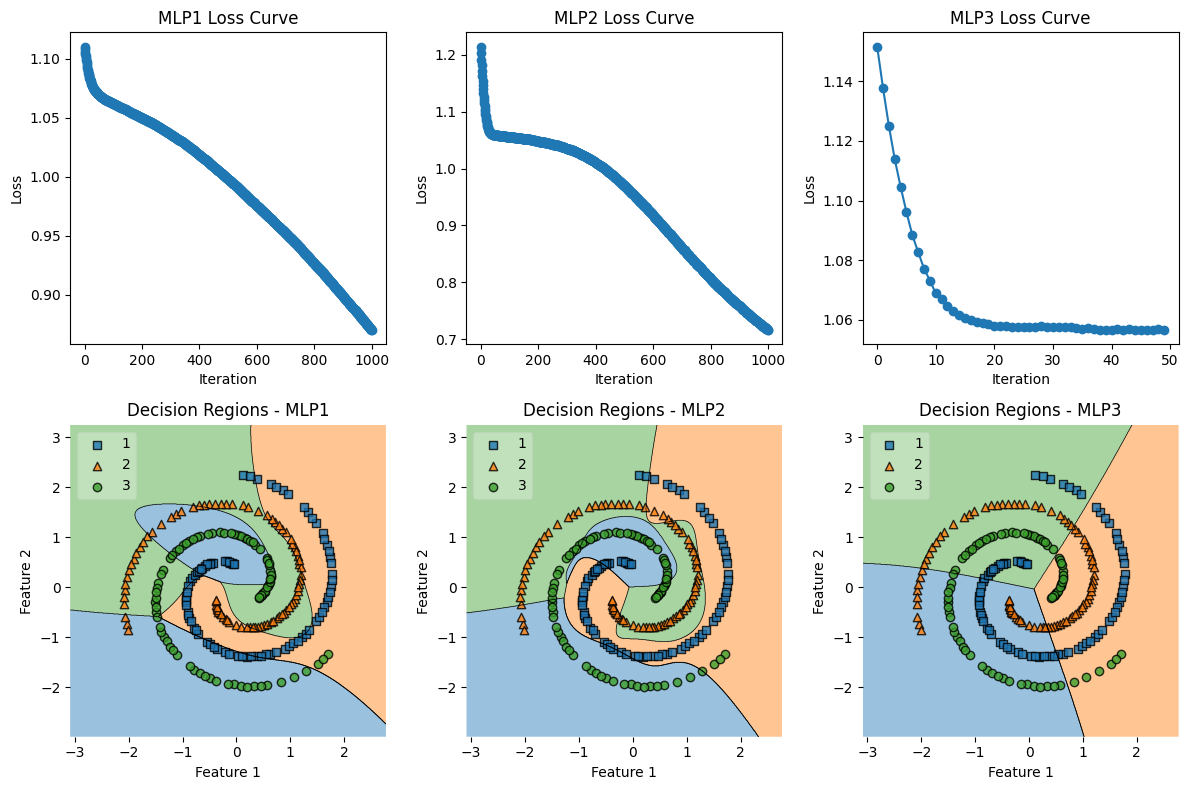

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'/content/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.12:
Run the code in Example Five and save the resulted plots.
1. Which model performs better in the spiral data set?

  Answer: Second
2. If we increase the iteration to 10,000, does the first model (mlp1) fit the data? Justify your answer.

  Answer: fits the data better than other models


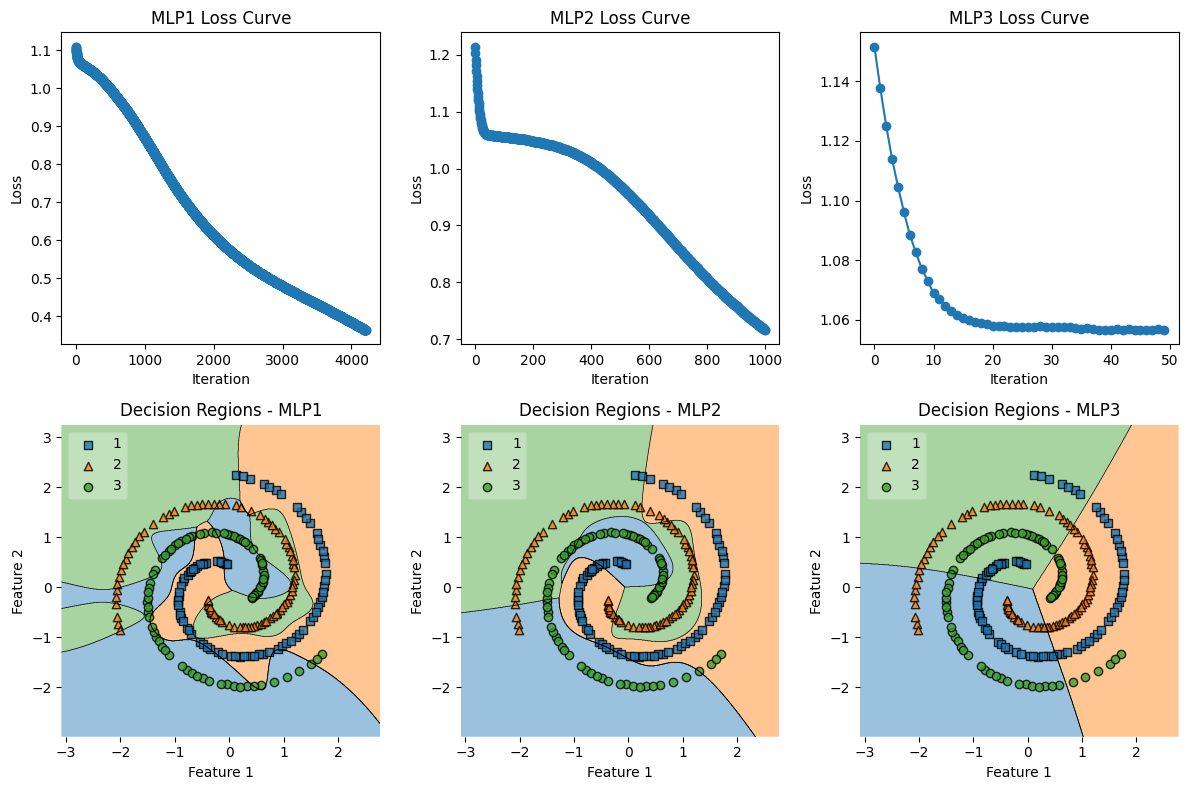

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'/content/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.13:
1. Modify the models in Example 5 (please make a copy) to use the relu activation function.
2. Run the modified code and save the resulting plots.
3. Which model performs better in the spiral data
set?

  Answer: MLP3
4. Compared to the models built in Example 5, does changing the activation function improve performance in these models? Justify your answer.

  Answer: yes

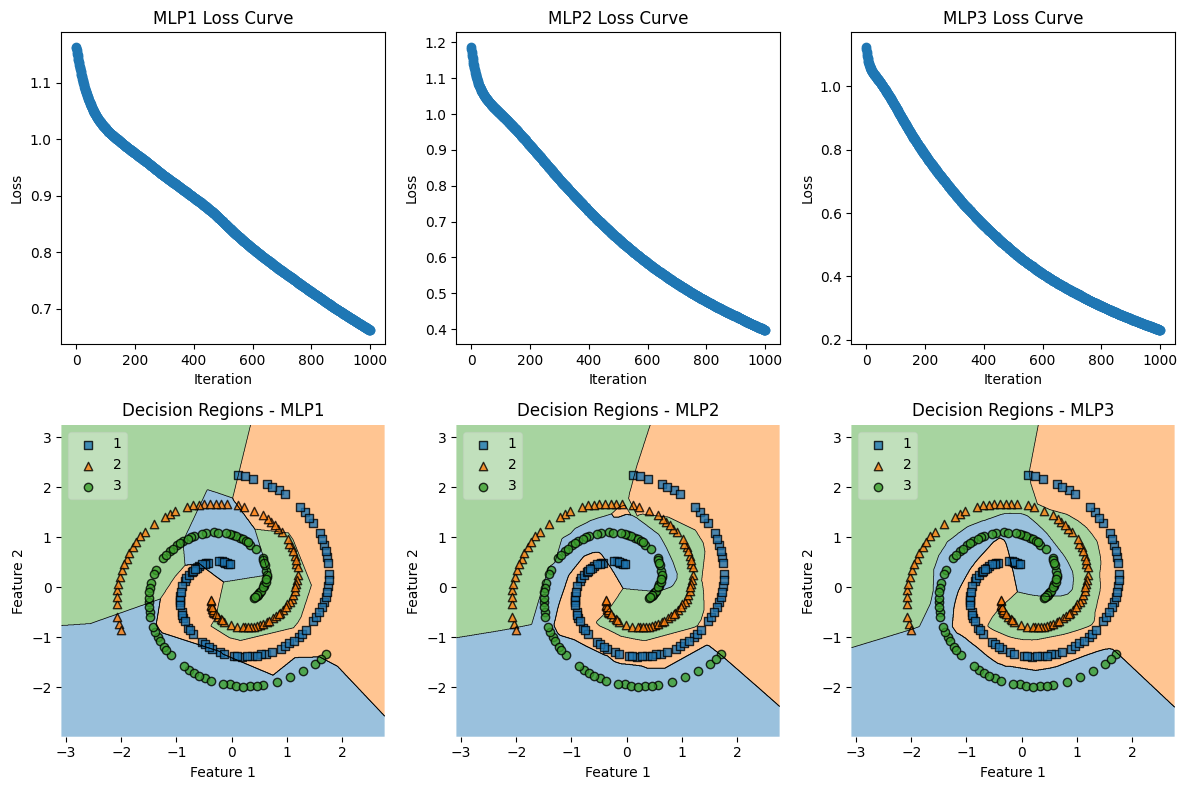

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'/content/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.14:
1. Modify the models in Example 5 (make a copy) to have the following hyperparameters. mlp1: hidden_layer_sizes=(7, 3), mlp2: hidden_layer_sizes=(27, 13), and mlp3 hidden_layer_sizes=(70, 30), all of them using the relu activation function.
2. Run the modified code and save the resulting plots.
3. Which model performs better in the spiral data set?

  Answer: MLP3
4. Compared to the models built in Example 5 and Task 13, which of these models performs better in the spiral dataset? Justify your answer.

  Answer: MLP3 in Task 14.

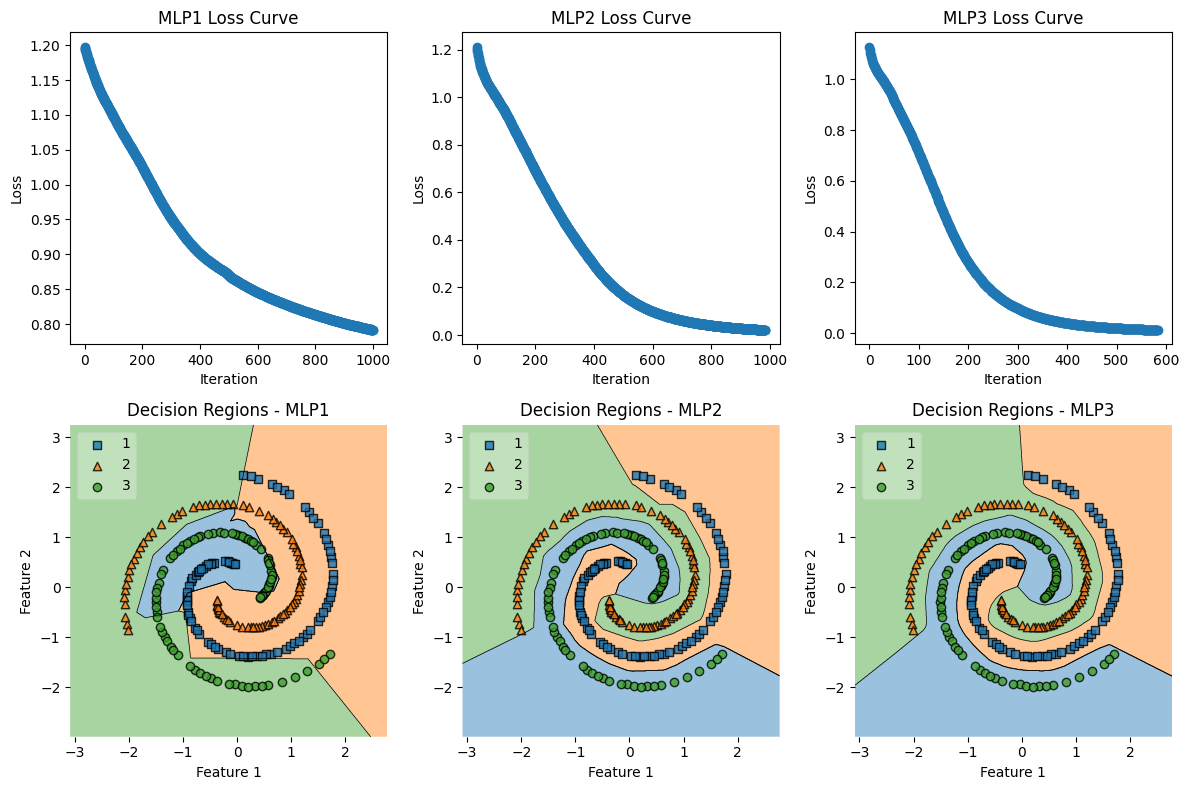

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'/content/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(7, 3), max_iter=1000, random_state=42,
activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Task 6.15:

use GridSearchCV method to automatically select hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(7, 3), (27, 13), (70, 30)],
    'activation': ['relu'],
    'learning_rate_init': [0.001],
    'max_iter': [1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1)  # Use all available cores for parallel processing

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_mlp = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_mlp.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (27, 13), 'learning_rate_init': 0.001, 'max_iter': 1000}
Accuracy on test set: 0.9841269841269841


# Example 6:
Python code for training three MLP classifiers with different value of alpha

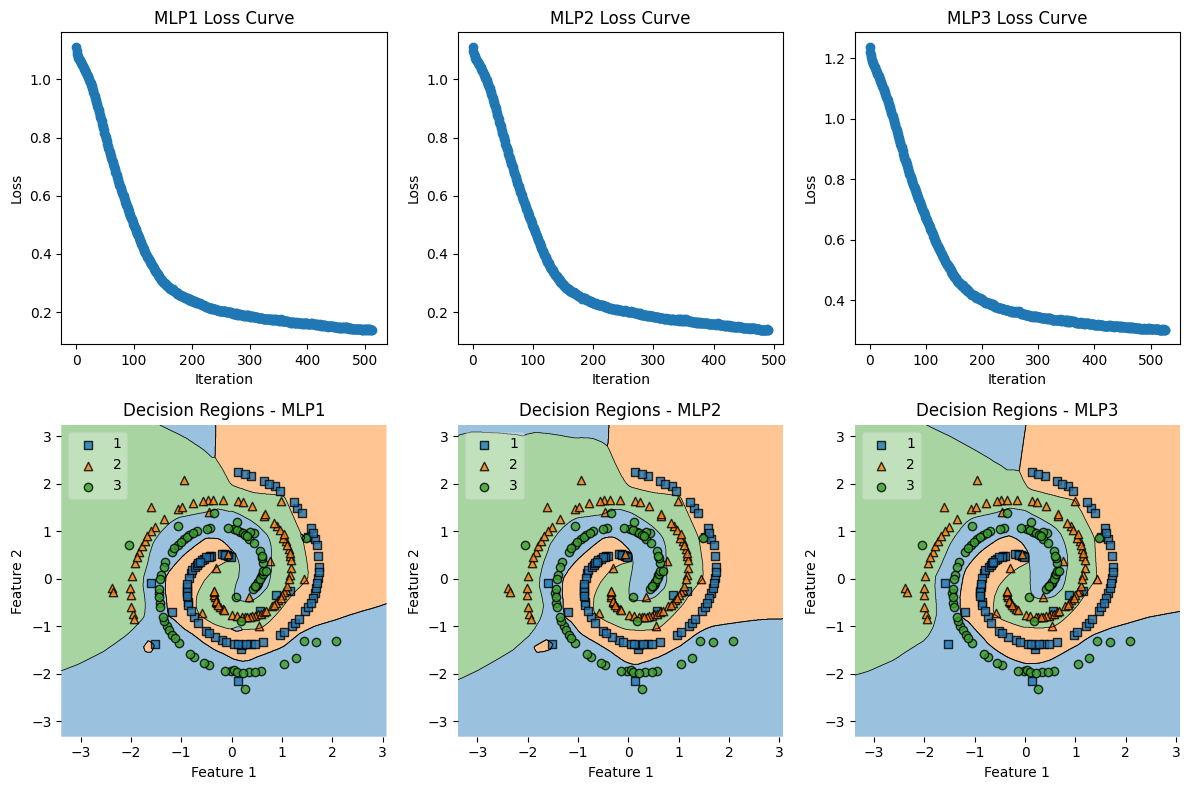

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

file_path = r'/content/spiral.csv'
data = pd.read_csv(file_path)

# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on your preference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()
spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7,
(np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-8)

mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-8, alpha=0.001)

mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
random_state=42, solver='adam',
learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.3)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()